In [46]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [47]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [48]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [49]:
sbn.pairplot(dataFrame)

VERİYİ TEST/TRAIN OLARAK İKİYE AYIRMAK

In [50]:
from sklearn.model_selection import train_test_split 
# Gerekli kütüphane. Makine öğrenmesinde çok fazla kullanılıyor.

In [51]:
# train_test_split

In [52]:
# y = wx + b
# y - > label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [53]:
x_train.shape 
# kaç satır ve sutun

(670, 2)

In [54]:
x_test.shape
# İki özellük olduğu için 2 sutun var

(330, 2)

In [55]:
y_train.shape

(670,)

In [56]:
y_test.shape

(330,)

In [57]:
# scaling -> verileri nöronlara vermeden önce yapılan işlem. Veriyi küçültmek veye büyültmek

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

In [60]:
scaler.fit(x_train)

MinMaxScaler()

In [61]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [62]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [63]:
import tensorflow as twf

In [64]:
from tensorflow.keras.models import Sequential # Model oluşturmak için
from tensorflow.keras.layers import Dense  # Katmanları eklemek için
import matplotlib.pyplot as plt

In [65]:
# Modelimizi hazırlıyoruz. Bu aşamadan sonra eğitim aşaması yapacağız

model = Sequential() # Modeli oluşturuyoruz.

model.add(Dense(4,activation = "relu")) # 4 -> nöron sayısı (deneyerek buluyoruz)
model.add(Dense(4,activation = "relu")) 
model.add(Dense(4,activation = "relu")) 
# 3 tane eklememizin sebebi : HIDDEN LAYERS sayısı
# https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.32158&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

model.add(Dense(1)) # Çıktı katmanı


model.compile(optimizer = "rmsprop", loss = "mse") # Kullanmak istediğimiz optimizasyon algoritmasını belirledik


In [66]:
# Model Eğitimi Aşaması
# Batch-size : Çok büyük bir verimiz varsa modele verileri bölerek vermek daha mantıklıdır.
# Epoch : Tur Sayısı. Verilerin üzerinden çok fazla geçilirse overfitting olabilir.

model.fit(x_train,y_train,epochs=250)





Epoch 1/250


21/21 [==============================] - 1s 3ms/step - loss: 795876.1250
Epoch 2/250
21/21 [==============================] - 0s 4ms/step - loss: 795776.1250
Epoch 3/250
21/21 [==============================] - 0s 3ms/step - loss: 795679.8125
Epoch 4/250
21/21 [==============================] - 0s 3ms/step - loss: 795577.3750
Epoch 5/250
21/21 [==============================] - 0s 3ms/step - loss: 795467.1250
Epoch 6/250
21/21 [==============================] - 0s 3ms/step - loss: 795348.1250
Epoch 7/250
21/21 [==============================] - 0s 3ms/step - loss: 795219.8750
Epoch 8/250
21/21 [==============================] - 0s 4ms/step - loss: 795079.1250
Epoch 9/250
21/21 [==============================] - 0s 3ms/step - loss: 794918.2500
Epoch 10/250
21/21 [==============================] - 0s 3ms/step - loss: 794729.7500
Epoch 11/250
21/21 [==============================] - 0s 3ms/step - loss: 794505.6250
Epoch 12/250
21/21 [==============================] - 0s 3ms/step - loss: 7

In [67]:
loss = model.history.history["loss"]

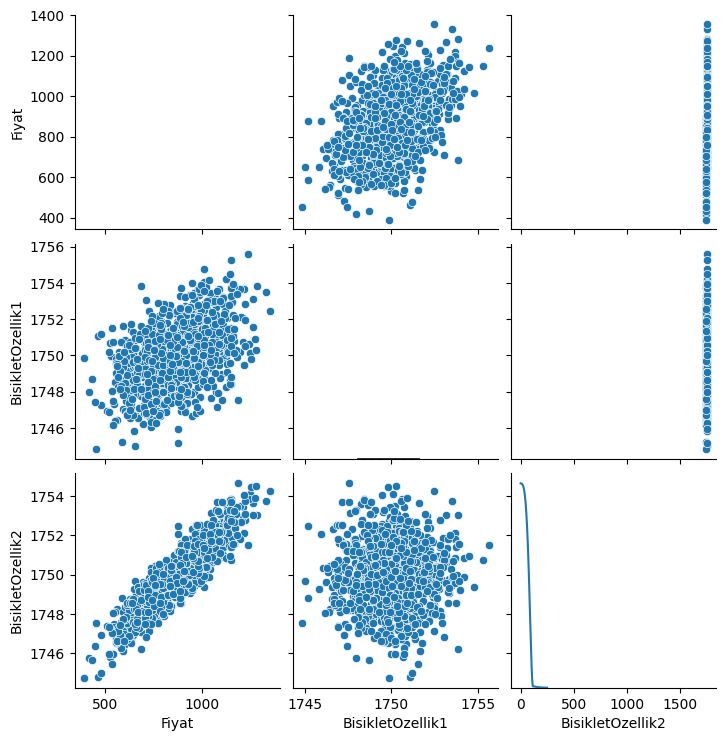

In [68]:
# sbn.lineplot(x=range(len(loss)), y = loss)

plt.plot(range(len(loss)), loss)
plt.show()

In [69]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)  # Loss değerlerini verir.
trainLoss

79.26068878173828

In [70]:
testLoss = model.evaluate(x_test,y_test,verbose=0)
testLoss

80.58931732177734

In [71]:
testTahminleri = model.predict(x_test)
testTahminleri

11/11 [==============================] - 0s 2ms/step


array([[1075.1754 ],
       [ 626.2931 ],
       [ 875.4916 ],
       [ 895.49927],
       [ 901.0461 ],
       [ 459.3908 ],
       [ 930.63617],
       [ 990.5764 ],
       [ 938.66614],
       [1015.07275],
       [ 751.75183],
       [ 915.80334],
       [ 947.8459 ],
       [1052.0393 ],
       [1116.761  ],
       [ 684.2528 ],
       [1125.3752 ],
       [ 655.5642 ],
       [1152.9509 ],
       [ 885.8934 ],
       [ 892.5248 ],
       [ 717.1107 ],
       [ 459.8922 ],
       [ 616.9982 ],
       [ 834.46716],
       [1087.6765 ],
       [ 716.0947 ],
       [ 758.7765 ],
       [ 874.4021 ],
       [ 772.2302 ],
       [ 457.16986],
       [ 783.1838 ],
       [ 730.14905],
       [ 650.3404 ],
       [ 886.8954 ],
       [ 844.3541 ],
       [1033.2966 ],
       [1022.182  ],
       [ 844.624  ],
       [ 862.89795],
       [ 758.1818 ],
       [1171.9083 ],
       [1094.8046 ],
       [1084.8486 ],
       [ 871.2293 ],
       [ 599.7066 ],
       [1144.483  ],
       [ 973.

In [72]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [73]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [74]:
tahminDf = pd.concat([tahminDf, testTahminleri], axis=1)
tahminDf

,Gerçek Y,0
0,1081.652164,1075.175415
1,622.675990,626.293091
2,889.356810,875.491577
3,902.826733,895.499268
4,897.662404,901.046082
...,...,...
325,1028.438035,1011.305176
326,789.934950,792.871704
327,758.490486,766.394836
328,1172.871659,1163.350830


In [75]:
tahminDf.columns = ["Gerçek Y" , "Tahmin Y"]
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1075.175415
1,622.675990,626.293091
2,889.356810,875.491577
3,902.826733,895.499268
4,897.662404,901.046082
...,...,...
325,1028.438035,1011.305176
326,789.934950,792.871704
327,758.490486,766.394836
328,1172.871659,1163.350830


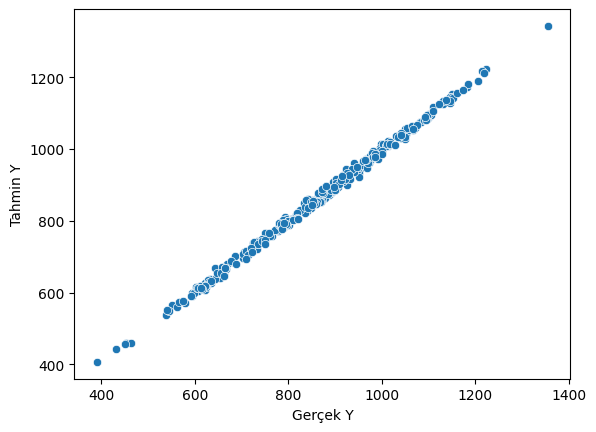

In [76]:
sbn.scatterplot(x = "Gerçek Y" ,y = "Tahmin Y", data = tahminDf)
# plt.scatter(x=tahminDf["Gerçek Y"], y=tahminDf["Tahmin Y"])
# plt.xlabel("Gerçek Y")
# plt.ylabel("Tahmin Y")
# plt.title("Scatter Plot - Gerçek Y vs Tahmin Y")
plt.show()

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Hata sapması (Gerçek hata ne kadar?)

In [78]:
mean_absolute_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"])

7.19249361695431

In [79]:
mean_squared_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"])

80.58930856381647

In [81]:
dataFrame.describe() # Ortalama, standart sapma vs.verir.

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [115]:
yeniBisiklerOzellikleri = [[1750,1749]]

In [116]:
yeniBisiklerOzellikleri = scaler.transform(yeniBisiklerOzellikleri)
# Yeni test verisi oluşturduk. Transform ile veri değerini orantılı oalrak küçülttük

In [117]:
model.predict(yeniBisiklerOzellikleri)
# Fiyat Tahmin yapıyor

1/1 [==============================] - 0s 52ms/step


array([[786.5778]], dtype=float32)

In [118]:
# Model kaydetme
from tensorflow.keras.models import load_model

In [119]:
model.save("bisiklet_modeli.h5")
# Tensorflow model uzantısı .h5 'tir

In [120]:
sonradanCagirilanModel = load_model("bisiklet_modeli.h5")
# Var olan modeli çağırdık

In [121]:
sonradanCagirilanModel.predict(yeniBisiklerOzellikleri)

1/1 [==============================] - 0s 196ms/step


array([[786.5778]], dtype=float32)